In [564]:
import pandas as pd

def select_state_data(csv_file, state_name):
    """
    Reads a CSV file, filters rows for Massachusetts, 
    and returns a DataFrame containing only Massachusetts data.
    """
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_file)

        # Filter rows based on the "state" column
        state_df = df[df["state"] == state_name]
        
        return state_df

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return None  # Return None in case of an error
    except KeyError:
        print(f"Error: Column 'state' not found in '{csv_file}'.")
        return None

# Usage:
csv_file_path_2020 = "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/Power_Outages/eaglei_outages_2020_raw.csv"  # Replace with your CSV file path
massachusetts_df_2020 = select_state_data(csv_file_path_2020, "Massachusetts")

csv_file_path_2021 = "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/Power_Outages/eaglei_outages_2021_raw.csv"  # Replace with your CSV file path
massachusetts_df_2021 = select_state_data(csv_file_path_2021, "Massachusetts")

csv_file_path_2022 = "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/Power_Outages/eaglei_outages_2022_raw.csv"  # Replace with your CSV file path
massachusetts_df_2022 = select_state_data(csv_file_path_2022, "Massachusetts")

csv_file_path_2023 = "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/Power_Outages/eaglei_outages_2023_raw.csv"  # Replace with your CSV file path
massachusetts_df_2023 = select_state_data(csv_file_path_2023, "Massachusetts")




dfs = [massachusetts_df_2020, massachusetts_df_2021, massachusetts_df_2022, massachusetts_df_2023]
years = [2020, 2021, 2022, 2023]

for df, year in zip(dfs, years):
    if df is not None:  # Check if filtering was successful
        unique_counties = df["county"].unique()
        num_unique_counties = len(unique_counties)

        print(f"Unique Counties in Massachusetts for {year}: {num_unique_counties}")
    else:
        print(f"No data available for Massachusetts in {year}")

MemoryError: Unable to allocate 585. MiB for an array with shape (3, 25545517) and data type object

In [ ]:
massachusetts_df_2023.rename(columns={'sum': 'customers_out'}, inplace=True)

In [565]:
county_name = "Franklin"

# Filter for Suffolk County
suffolk_df_2020 = massachusetts_df_2020[massachusetts_df_2020["county"] == county_name]
suffolk_df_2021 = massachusetts_df_2021[massachusetts_df_2021["county"] == county_name]
suffolk_df_2022 = massachusetts_df_2022[massachusetts_df_2022["county"] == county_name]
suffolk_df_2023 = massachusetts_df_2023[massachusetts_df_2023["county"] == county_name]

suffolk_df_2022.head()
# Save to CSV
#suffolk_df.to_csv("suffolk_outages.csv", index=False) 

#print("Data for Suffolk County has been saved to 'suffolk_outages.csv'")

,fips_code,county,state,customers_out,run_start_time
108106,25011,Franklin,Massachusetts,1,2022-01-02 14:45:00
121153,25011,Franklin,Massachusetts,1,2022-01-02 18:30:00
174979,25011,Franklin,Massachusetts,1,2022-01-03 12:00:00
175894,25011,Franklin,Massachusetts,1,2022-01-03 12:15:00
176822,25011,Franklin,Massachusetts,1,2022-01-03 12:30:00


In [566]:
# List of DataFrames and corresponding years
dataframes = [suffolk_df_2020, suffolk_df_2021, suffolk_df_2022, suffolk_df_2023]
years = [2020, 2021, 2022, 2023]

# Iterate through each DataFrame and print the required information
for df, year in zip(dataframes, years):
    print(f"\nYear: {year}")

    if df is not None and not df.empty:  # Check if the DataFrame exists and is not empty
        print(f"Number of rows: {df.shape[0]}") 
        print(f"Column names: {df.columns.tolist()}")  # Convert to list for better readability
    else:
        print("DataFrame is empty or does not exist.")


Year: 2020
Number of rows: 6290
Column names: ['fips_code', 'county', 'state', 'customers_out', 'run_start_time']

Year: 2021
Number of rows: 6449
Column names: ['fips_code', 'county', 'state', 'customers_out', 'run_start_time']

Year: 2022
Number of rows: 5943
Column names: ['fips_code', 'county', 'state', 'customers_out', 'run_start_time']

Year: 2023
Number of rows: 6799
Column names: ['fips_code', 'county', 'state', 'customers_out', 'run_start_time']


In [567]:
# List of DataFrames to concatenate
dataframes_to_concat = [suffolk_df_2020, suffolk_df_2021, suffolk_df_2022, suffolk_df_2023]

# Concatenate the DataFrames
suffolk_df = pd.concat(dataframes_to_concat, ignore_index=True)

# Optional: Reset the index if needed
# suffolk_df.reset_index(drop=True, inplace=True)

# Display the first few rows of the concatenated DataFrame (optional)
print(suffolk_df.tail(5000))

       fips_code    county          state  customers_out       run_start_time
20481      25011  Franklin  Massachusetts           71.0  2023-03-17 14:15:00
20482      25011  Franklin  Massachusetts           71.0  2023-03-17 14:30:00
20483      25011  Franklin  Massachusetts           71.0  2023-03-17 14:45:00
20484      25011  Franklin  Massachusetts           71.0  2023-03-17 15:00:00
20485      25011  Franklin  Massachusetts           70.0  2023-03-17 15:15:00
...          ...       ...            ...            ...                  ...
25476      25011  Franklin  Massachusetts           12.0  2023-12-31 14:00:00
25477      25011  Franklin  Massachusetts           12.0  2023-12-31 14:15:00
25478      25011  Franklin  Massachusetts           12.0  2023-12-31 14:30:00
25479      25011  Franklin  Massachusetts           14.0  2023-12-31 14:45:00
25480      25011  Franklin  Massachusetts           14.0  2023-12-31 15:00:00

[5000 rows x 5 columns]


In [568]:
#Enrich with information about weekend/ weekday
suffolk_df['run_start_time'] = pd.to_datetime(suffolk_df['run_start_time'])

suffolk_df = suffolk_df.sort_values('run_start_time')

suffolk_df['Weekend'] = suffolk_df['run_start_time'].dt.weekday.isin([5, 6]).astype(int)

suffolk_df.head(500)

,fips_code,county,state,customers_out,run_start_time,Weekend
0,25011,Franklin,Massachusetts,10.0,2020-01-01 00:00:00,0
1,25011,Franklin,Massachusetts,10.0,2020-01-01 00:15:00,0
2,25011,Franklin,Massachusetts,11.0,2020-01-01 00:30:00,0
3,25011,Franklin,Massachusetts,11.0,2020-01-01 00:45:00,0
4,25011,Franklin,Massachusetts,9.0,2020-01-01 01:00:00,0
...,...,...,...,...,...,...
495,25011,Franklin,Massachusetts,4.0,2020-02-08 16:15:00,1
496,25011,Franklin,Massachusetts,8.0,2020-02-08 16:30:00,1
497,25011,Franklin,Massachusetts,7.0,2020-02-08 16:45:00,1
498,25011,Franklin,Massachusetts,11.0,2020-02-08 17:00:00,1


In [569]:
def get_season(date):
    month = date.month
    day = date.day

    if (month == 3 and day >= 1) or (month >= 4 and month <= 5) or (month == 6 and day == 1):
        return 2  # Spring
    elif month >= 6 and month <= 8:
        return 1  # Summer
    elif month >= 9 and month <= 11:
        return 2  # Fall
    else:
        return 3  # Winter

# Apply the function to create the 'Season' column
suffolk_df['Season'] = suffolk_df['run_start_time'].apply(get_season)

# Display the updated DataFrame (optional)
suffolk_df.head(19100)

,fips_code,county,state,customers_out,run_start_time,Weekend,Season
0,25011,Franklin,Massachusetts,10.0,2020-01-01 00:00:00,0,3
1,25011,Franklin,Massachusetts,10.0,2020-01-01 00:15:00,0,3
2,25011,Franklin,Massachusetts,11.0,2020-01-01 00:30:00,0,3
3,25011,Franklin,Massachusetts,11.0,2020-01-01 00:45:00,0,3
4,25011,Franklin,Massachusetts,9.0,2020-01-01 01:00:00,0,3
...,...,...,...,...,...,...,...
19095,25011,Franklin,Massachusetts,766.0,2023-01-23 13:30:00,0,3
19096,25011,Franklin,Massachusetts,772.0,2023-01-23 13:45:00,0,3
19097,25011,Franklin,Massachusetts,788.0,2023-01-23 14:00:00,0,3
19098,25011,Franklin,Massachusetts,742.0,2023-01-23 14:15:00,0,3


In [570]:
suffolk_df.to_csv('suffolk_df.csv', index=False)

print("DataFrame exported to 'suffolk_df.csv'")

DataFrame exported to 'suffolk_df.csv'


Remark: 
Here we define Summer = 1, Spring/Fall = 2, Winter = 3 as the "seasons"

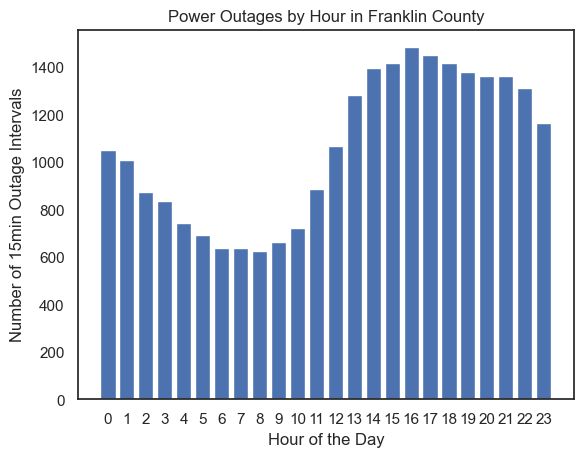

,fips_code,county,state,customers_out,run_start_time,Weekend,Season,hour
0,25011,Franklin,Massachusetts,10.0,2020-01-01 00:00:00,0,3,0
1,25011,Franklin,Massachusetts,10.0,2020-01-01 00:15:00,0,3,0
2,25011,Franklin,Massachusetts,11.0,2020-01-01 00:30:00,0,3,0
3,25011,Franklin,Massachusetts,11.0,2020-01-01 00:45:00,0,3,0
4,25011,Franklin,Massachusetts,9.0,2020-01-01 01:00:00,0,3,1


In [571]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'run_start_time' to datetime (assuming it's in a suitable string format)
suffolk_df['run_start_time'] = pd.to_datetime(suffolk_df['run_start_time'])

# Extract the hour from the 'run_start_time'
suffolk_df['hour'] = suffolk_df['run_start_time'].dt.hour

# Count the number of outages per hour
outage_counts_by_hour = suffolk_df['hour'].value_counts().sort_index()

# Plot the histogram
plt.bar(outage_counts_by_hour.index, outage_counts_by_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of 15min Outage Intervals')
plt.title(f'Power Outages by Hour in {county_name} County')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.show()

suffolk_df.head()

The afternoon hours are more exposed to power outages.

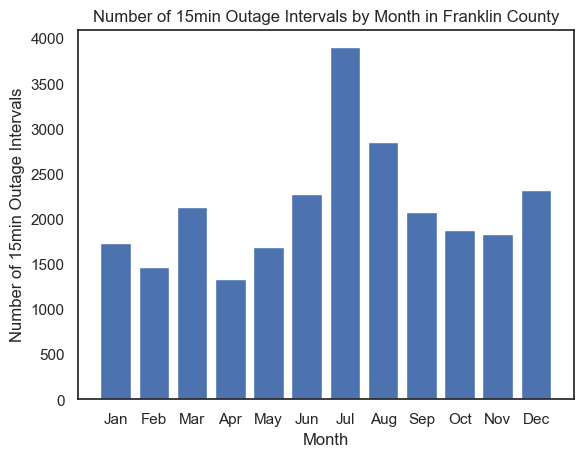

In [572]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_outages_by_month(county_df):
    try:
        

        # Extract the month from the `run_start_time` column
        county_df['month'] = county_df['run_start_time'].dt.month

        # Count the number of outages per month and sort by month number
        outage_counts_by_month = county_df['month'].value_counts().sort_index()

        # Plot the histogram
        plt.bar(outage_counts_by_month.index, outage_counts_by_month.values)
        plt.xlabel('Month')
        plt.ylabel('Number of 15min Outage Intervals')
        plt.title(f'Number of 15min Outage Intervals by Month in {county_name} County')
        plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        plt.show()

    except FileNotFoundError:
        print(f"Error: File '{csv_file_path}' not found.")
    except KeyError as e:
        print(f"Error: Column '{e.args[0]}' not found in '{csv_file_path}'.")


# Usage
plot_outages_by_month(suffolk_df)

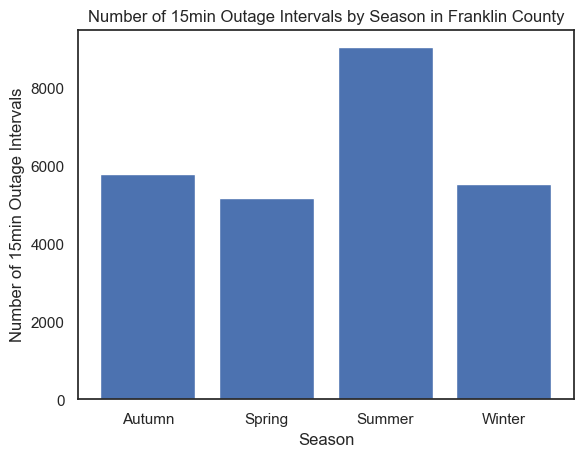

In [573]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_outages_by_season(county_df):
    try:
        # Extract the month from the `run_start_time` column
        county_df['month'] = county_df['run_start_time'].dt.month

        # Define a dictionary to map months to seasons
        season_map = {
            1: 'Winter', 2: 'Winter', 12: 'Winter',
            3: 'Spring', 4: 'Spring', 5: 'Spring',
            6: 'Summer', 7: 'Summer', 8: 'Summer',
            9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
        }

        # Create a new 'season' column based on the month
        county_df['season'] = county_df['month'].map(season_map)

        # Count the number of outages per season
        outage_counts_by_season = county_df['season'].value_counts().sort_index()

        # Plot the histogram
        plt.bar(outage_counts_by_season.index, outage_counts_by_season.values)
        plt.xlabel('Season')
        plt.ylabel('Number of 15min Outage Intervals')
        plt.title(f'Number of 15min Outage Intervals by Season in {county_name} County')
        plt.show()

    except FileNotFoundError:
        print(f"Error: File '{csv_file_path}' not found.")
    except KeyError as e:
        print(f"Error: Column '{e.args[0]}' not found in '{csv_file_path}'.")

# Usage
plot_outages_by_season(suffolk_df)

There seem to be more power outages during the summer months.

In [574]:
# Sort by 'run_start_time' to ensure chronological order
suffolk_df = suffolk_df.sort_values('run_start_time')

# Calculate the time difference between consecutive rows in minutes
suffolk_df['time_diff'] = suffolk_df['run_start_time'].diff().dt.total_seconds() / 60

# Fill the first difference (which will be NaN) with 15 (assuming the first row is the start of an outage)
suffolk_df['time_diff'].fillna(15, inplace=True)

# Create an 'outage_id' column to group consecutive 15-minute intervals into outages
suffolk_df['outage_id'] = (suffolk_df['time_diff'] > 15).cumsum()  # Increment outage_id whenever time_diff is greater than 15

suffolk_df.head(80)

#try

C:\Users\jonas\AppData\Local\Temp\ipykernel_2756\3970779610.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  suffolk_df['time_diff'].fillna(15, inplace=True)


,fips_code,county,state,customers_out,run_start_time,Weekend,Season,hour,month,season,time_diff,outage_id
0,25011,Franklin,Massachusetts,10.0,2020-01-01 00:00:00,0,3,0,1,Winter,15.0,0
1,25011,Franklin,Massachusetts,10.0,2020-01-01 00:15:00,0,3,0,1,Winter,15.0,0
2,25011,Franklin,Massachusetts,11.0,2020-01-01 00:30:00,0,3,0,1,Winter,15.0,0
3,25011,Franklin,Massachusetts,11.0,2020-01-01 00:45:00,0,3,0,1,Winter,15.0,0
4,25011,Franklin,Massachusetts,9.0,2020-01-01 01:00:00,0,3,1,1,Winter,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
75,25011,Franklin,Massachusetts,20.0,2020-01-03 15:45:00,0,3,15,1,Winter,15.0,4
76,25011,Franklin,Massachusetts,18.0,2020-01-04 13:45:00,1,3,13,1,Winter,1320.0,5
77,25011,Franklin,Massachusetts,18.0,2020-01-04 14:00:00,1,3,14,1,Winter,15.0,5
78,25011,Franklin,Massachusetts,18.0,2020-01-04 14:15:00,1,3,14,1,Winter,15.0,5


In [575]:
# Create a boolean mask to identify the first row of each outage group
is_start_of_outage = suffolk_df['outage_id'] != suffolk_df['outage_id'].shift(1)

# Filter the DataFrame using the mask to get only the starting times
suffolk_starting_df = suffolk_df[is_start_of_outage].copy()  # Make a copy to avoid modifying the original DataFrame

suffolk_starting_df.head()

,fips_code,county,state,customers_out,run_start_time,Weekend,Season,hour,month,season,time_diff,outage_id
0,25011,Franklin,Massachusetts,10.0,2020-01-01 00:00:00,0,3,0,1,Winter,15.0,0
32,25011,Franklin,Massachusetts,2.0,2020-01-01 16:30:00,0,3,16,1,Winter,525.0,1
37,25011,Franklin,Massachusetts,19.0,2020-01-01 19:00:00,0,3,19,1,Winter,90.0,2
73,25011,Franklin,Massachusetts,1.0,2020-01-02 08:00:00,0,3,8,1,Winter,255.0,3
74,25011,Franklin,Massachusetts,20.0,2020-01-03 15:30:00,0,3,15,1,Winter,1890.0,4


In [576]:
# Group by 'outage_id' and count the number of intervals to get the outage duration in intervals
outage_durations_df = suffolk_df.groupby('outage_id').size().reset_index(name='duration_intervals')

# Convert duration from intervals to minutes
outage_durations_df['duration_minutes'] = outage_durations_df['duration_intervals'] * 15

outage_durations_df.head()

,outage_id,duration_intervals,duration_minutes
0,0,32,480
1,1,5,75
2,2,36,540
3,3,1,15
4,4,2,30


In [577]:
# Create a boolean mask to identify the first row of each outage group
is_start_of_outage = suffolk_df['outage_id'] != suffolk_df['outage_id'].shift(1)

# Filter the DataFrame using the mask to get only the starting times
suffolk_starting_df = suffolk_df[is_start_of_outage].copy() 

# Group by 'outage_id' and count the number of intervals to get the outage duration in intervals
outage_durations_df = suffolk_df.groupby('outage_id').size().reset_index(name='duration_intervals')

# Convert duration from intervals to minutes
outage_durations_df['duration_minutes'] = outage_durations_df['duration_intervals'] * 15

# Merge the two DataFrames on 'outage_id'
suffolk_starting_df = pd.merge(suffolk_starting_df, outage_durations_df, on='outage_id', how='left')
suffolk_starting_df.drop(columns=['time_diff'], inplace=True)

suffolk_starting_df.head() 

,fips_code,county,state,customers_out,run_start_time,Weekend,Season,hour,month,season,outage_id,duration_intervals,duration_minutes
0,25011,Franklin,Massachusetts,10.0,2020-01-01 00:00:00,0,3,0,1,Winter,0,32,480
1,25011,Franklin,Massachusetts,2.0,2020-01-01 16:30:00,0,3,16,1,Winter,1,5,75
2,25011,Franklin,Massachusetts,19.0,2020-01-01 19:00:00,0,3,19,1,Winter,2,36,540
3,25011,Franklin,Massachusetts,1.0,2020-01-02 08:00:00,0,3,8,1,Winter,3,1,15
4,25011,Franklin,Massachusetts,20.0,2020-01-03 15:30:00,0,3,15,1,Winter,4,2,30


In [578]:
# Count outages longer than 480 minutes
longer_than_480 = suffolk_starting_df[suffolk_starting_df['duration_minutes'] >= 60].shape[0]

# Count outages shorter than or equal to 480 minutes
shorter_than_or_equal_to_480 = suffolk_starting_df[suffolk_starting_df['duration_minutes'] >= 480].shape[0]

print("Number of outages longer than 60 minutes:", longer_than_480)
print("Number of outages longer than 480 minutes:", shorter_than_or_equal_to_480)

Number of outages longer than 60 minutes: 1740
Number of outages longer than 480 minutes: 113


In [579]:
# Find the row with the maximum 'duration_minutes'
max_duration_row = suffolk_starting_df.loc[suffolk_starting_df['duration_minutes'].idxmax()]

# Extract the outage_id of the row with the maximum duration
max_outage_id = max_duration_row['outage_id']
print(max_duration_row)

fips_code                           25011
county                           Franklin
state                       Massachusetts
customers_out                         1.0
run_start_time        2023-03-14 05:00:00
Weekend                                 0
Season                                  2
hour                                    5
month                                   3
season                             Spring
outage_id                            2197
duration_intervals                    408
duration_minutes                     6120
Name: 2197, dtype: object


In [580]:

import pandas as pd

# Calculate the threshold for the 0.1% longest outages
threshold = int(0.001 * len(suffolk_starting_df))

# Sort by duration in descending order
df_sorted = suffolk_starting_df.sort_values(by='duration_minutes', ascending=False)

# Select and display the top rows (0.1% longest)
top_outages = df_sorted.head(threshold)

if top_outages.empty:
    print("No outages found within the top 0.1%.")
else:
    print("\nTop 0.1% Longest Outages in Suffolk County:\n")
    print(top_outages)


Top 0.1% Longest Outages in Suffolk County:

      fips_code    county          state  customers_out      run_start_time  \
2197      25011  Franklin  Massachusetts            1.0 2023-03-14 05:00:00   
394       25011  Franklin  Massachusetts            2.0 2020-08-04 19:15:00   

      Weekend  Season  hour  month  season  outage_id  duration_intervals  \
2197        0       2     5      3  Spring       2197                 408   
394         0       1    19      8  Summer        394                 396   

      duration_minutes  
2197              6120  
394               5940  


In [581]:
suffolk_starting_df.to_csv('suffolk_starting_df.csv', index=False)

print("DataFrame exported to 'suffolk_starting_df.csv'")

DataFrame exported to 'suffolk_starting_df.csv'


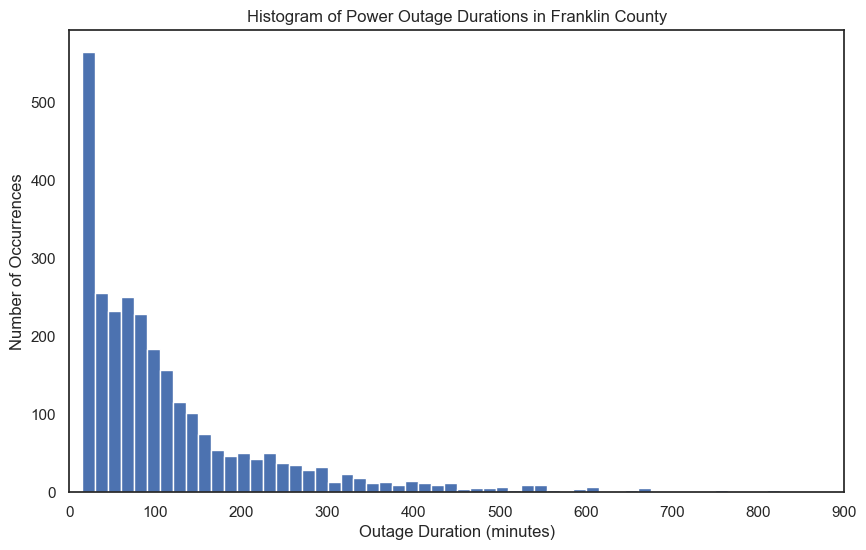

In [582]:
# Plot the histogram
plt.figure(figsize=(10, 6)) 
plt.xlim(0, 900)
plt.hist(suffolk_starting_df['duration_minutes'], bins = list(range(0, 15000, 15)))  # Adjust 'bins' as needed
plt.xlabel('Outage Duration (minutes)')
plt.ylabel('Number of Occurrences')
plt.title(f'Histogram of Power Outage Durations in {county_name} County')
plt.show()

In [583]:
import pandas as pd

# Define the bins for the outage duration categories
bins = [0, 61, 181, 361, 1441, float('inf')]  # float('inf') represents infinity for the last bin

# Create labels for the categories
labels = ['0-60min', '61-180min', '181-360min', '361-1440min', '>1440min']

# Create a new column 'duration_category' and categorize the 'duration_minutes'
suffolk_starting_df['duration_category'] = pd.cut(suffolk_starting_df['duration_minutes'], bins=bins, labels=labels, right=False)

# Count the occurrences of each category
category_counts = suffolk_starting_df['duration_category'].value_counts()

# Calculate the percentage of each category
total_count = len(suffolk_starting_df)
category_frequency = (category_counts / total_count) * 100

category_order = ['0-60min', '61-180min', '181-360min', '361-1440min', '>1440min']
category_frequency = category_frequency.reindex(category_order)

# Add a clear title
print("\nFrequency of Power Outage Durations in Suffolk County:\n")

# Display the sorted and formatted table
print(category_frequency.to_string(float_format='{:.2f}%'.format)) 


Frequency of Power Outage Durations in Suffolk County:

duration_category
0-60min       46.61%
61-180min     34.32%
181-360min    12.68%
361-1440min    5.73%
>1440min       0.64%


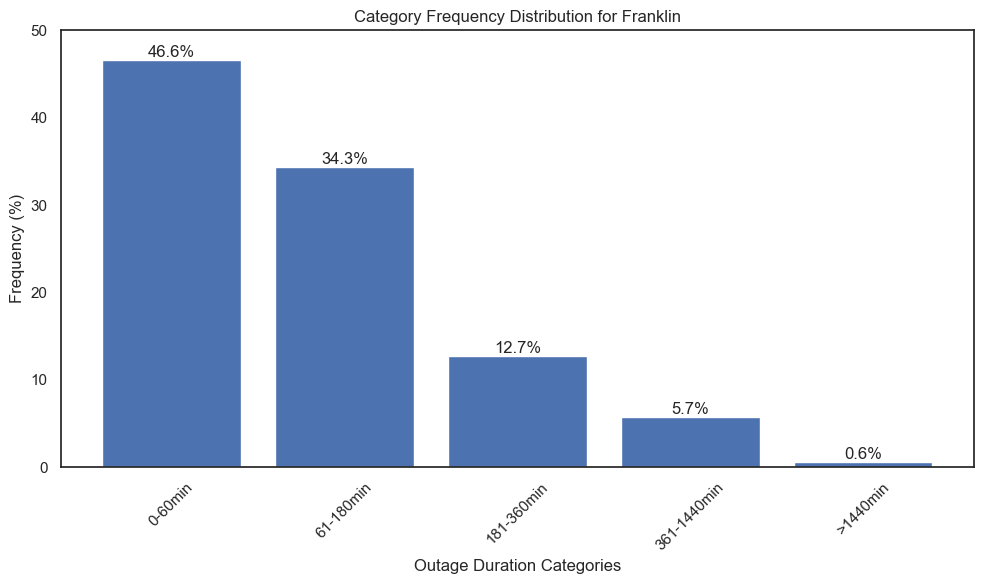

In [584]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, category_frequency)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Outage Duration Categories')
plt.ylabel('Frequency (%)')
plt.title(f'Category Frequency Distribution for {county_name}')
plt.ylim(0, 50)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

Almost 40% of power outages are shorter than 1hour. 

Around 65% (two thirds) of power outages are shorter than 3 hours.

Less than 2% of power outages last longer than 24h.

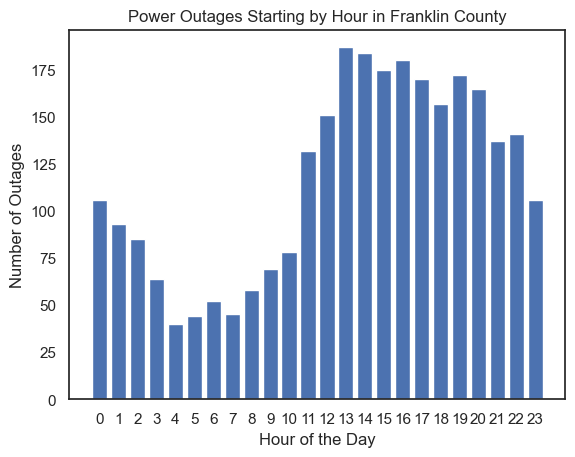

In [585]:
# Count the number of outages per hour
starting_outage_counts_by_hour = suffolk_starting_df['hour'].value_counts().sort_index()

# Plot the histogram
plt.bar(starting_outage_counts_by_hour.index, starting_outage_counts_by_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Outages')
plt.title(f'Power Outages Starting by Hour in {county_name} County')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.show()

#try3

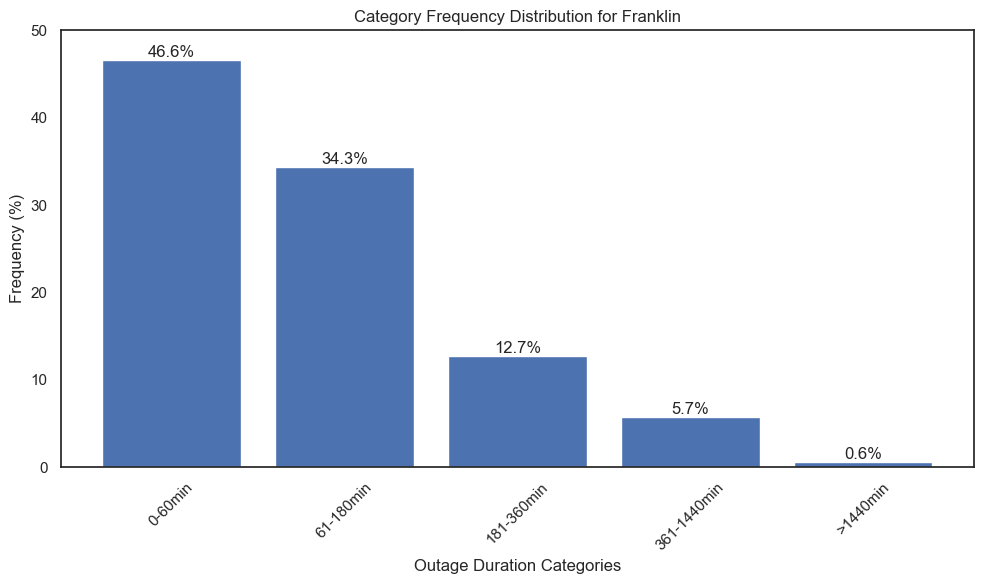

In [586]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, category_frequency)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Outage Duration Categories')
plt.ylabel('Frequency (%)')
plt.title(f'Category Frequency Distribution for {county_name}')
plt.ylim(0, 50)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

Power outages often start in the early afternoon and rarely in the morning hours.

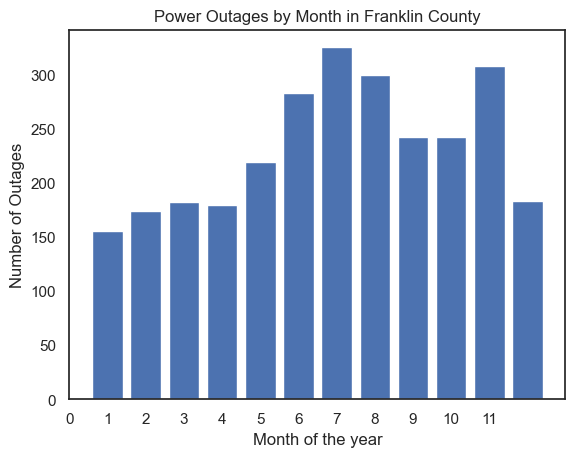

In [587]:
# Count the number of outages per month
starting_outage_counts_by_month = suffolk_starting_df['month'].value_counts().sort_index()

# Plot the histogram
plt.bar(starting_outage_counts_by_month.index, starting_outage_counts_by_month.values)
plt.xlabel('Month of the year')
plt.ylabel('Number of Outages')
plt.title(f'Power Outages by Month in {county_name} County')
plt.xticks(range(12))  # Set x-axis ticks for each hour
plt.show()

In [588]:
# Count the occurrences of outages for Weekend = 0 and Weekend = 1
weekday_outages_count = suffolk_starting_df['Weekend'].value_counts().get(0, 0)  # Get count for Weekend=0, default to 0 if not present
weekend_outages_count = suffolk_starting_df['Weekend'].value_counts().get(1, 0)  # Get count for Weekend=1, default to 0 if not present

# Print the results
print("Number of outages on weekdays (Weekend = 0):", weekday_outages_count)
print("Number of outages on weekends (Weekend = 1):", weekend_outages_count)

Number of outages on weekdays (Weekend = 0): 2070
Number of outages on weekends (Weekend = 1): 721


This represents a percentage of 71 % of outages on weekdays which is almost exavtly the 71.4% of weekdays within a week (5/7).

Thus there is no pattern concerning weekend/weekdays. 

In [589]:
# Display the updated DataFrame
suffolk_starting_df.head(5000)

,fips_code,county,state,customers_out,run_start_time,Weekend,Season,hour,month,season,outage_id,duration_intervals,duration_minutes,duration_category
0,25011,Franklin,Massachusetts,10.0,2020-01-01 00:00:00,0,3,0,1,Winter,0,32,480,361-1440min
1,25011,Franklin,Massachusetts,2.0,2020-01-01 16:30:00,0,3,16,1,Winter,1,5,75,61-180min
2,25011,Franklin,Massachusetts,19.0,2020-01-01 19:00:00,0,3,19,1,Winter,2,36,540,361-1440min
3,25011,Franklin,Massachusetts,1.0,2020-01-02 08:00:00,0,3,8,1,Winter,3,1,15,0-60min
4,25011,Franklin,Massachusetts,20.0,2020-01-03 15:30:00,0,3,15,1,Winter,4,2,30,0-60min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,25011,Franklin,Massachusetts,1.0,2023-12-28 20:15:00,0,3,20,12,Winter,2786,3,45,0-60min
2787,25011,Franklin,Massachusetts,1.0,2023-12-29 18:00:00,0,3,18,12,Winter,2787,3,45,0-60min
2788,25011,Franklin,Massachusetts,1.0,2023-12-30 01:30:00,1,3,1,12,Winter,2788,3,45,0-60min
2789,25011,Franklin,Massachusetts,1.0,2023-12-30 23:30:00,1,3,23,12,Winter,2789,16,240,181-360min


In [590]:
# Calculate the product of 'duration_minutes' and 'customers_out' for each row
suffolk_starting_df['customer_outage_minutes'] = suffolk_starting_df['duration_minutes'] * suffolk_starting_df['customers_out']

# Sum the values in the 'customer_outage_minutes' column
total_customer_outage_minutes = suffolk_starting_df['customer_outage_minutes'].sum()


total_sum_customers_out = suffolk_starting_df['customers_out'].sum()

outage_minutes_per_customer_year = total_customer_outage_minutes / total_sum_customers_out

print(outage_minutes_per_customer_year)

201.40789278839034


The average customer outage time was 324 min (5h).

Meaning that on average for a customer that is out of power, this interruption lasted 5h. 

Note: Taking the percentage values from before we get to 260min. Meaning that bigger outages often last longer (more people affected because probably bigger lines down).

In [591]:
import pandas as pd

# Select the relevant columns for the correlation analysis
columns_to_analyze = ['hour', 'month', 'duration_minutes', 'Weekend', 'Season', 'customers_out']
subset_df = suffolk_starting_df[columns_to_analyze]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Print the correlation matrix
print(correlation_matrix)

                      hour     month  duration_minutes   Weekend    Season  \
hour              1.000000 -0.065344         -0.004979 -0.018692  0.021116   
month            -0.065344  1.000000         -0.019726 -0.001130 -0.149100   
duration_minutes -0.004979 -0.019726          1.000000 -0.009890 -0.001080   
Weekend          -0.018692 -0.001130         -0.009890  1.000000  0.005536   
Season            0.021116 -0.149100         -0.001080  0.005536  1.000000   
customers_out    -0.017328 -0.010593          0.032191 -0.019107 -0.012653   

                  customers_out  
hour                  -0.017328  
month                 -0.010593  
duration_minutes       0.032191  
Weekend               -0.019107  
Season                -0.012653  
customers_out          1.000000  


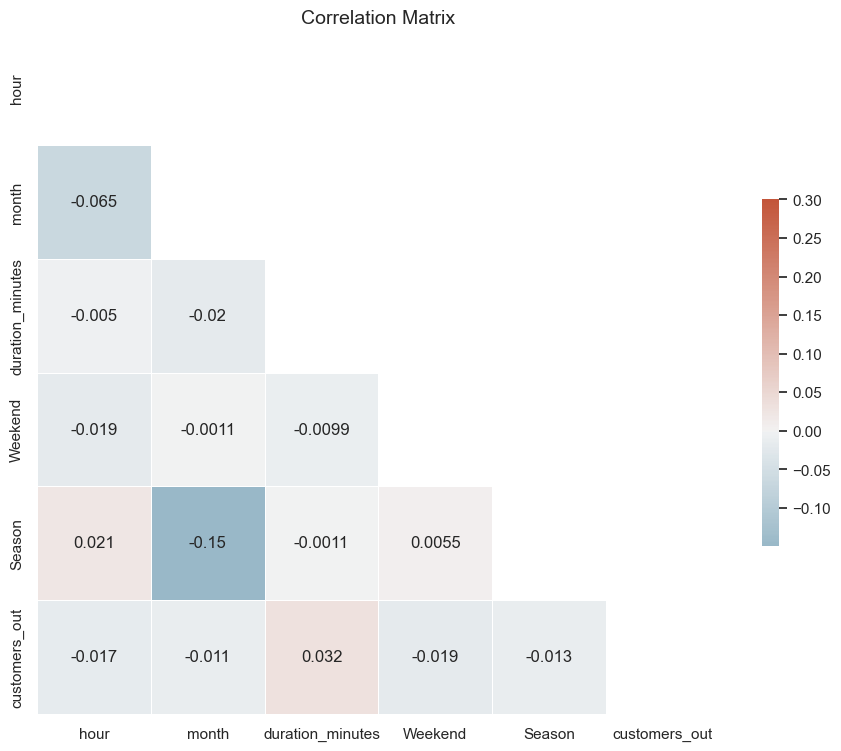

In [592]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the aesthetic style of the plots
sns.set_theme(style="white")

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Generate a mask for the upper triangle (to avoid redundant information)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix', fontsize=14)
plt.show()

Only very weak correlations are observed! counter intuitive

Note positive correlation between duration of outage and number of customers out. Bigger outages affect more people and take longer to be resolved.

Text(0.5, 1.0, 'Scatter Plot of Outage Duration vs. Hour of the Day')

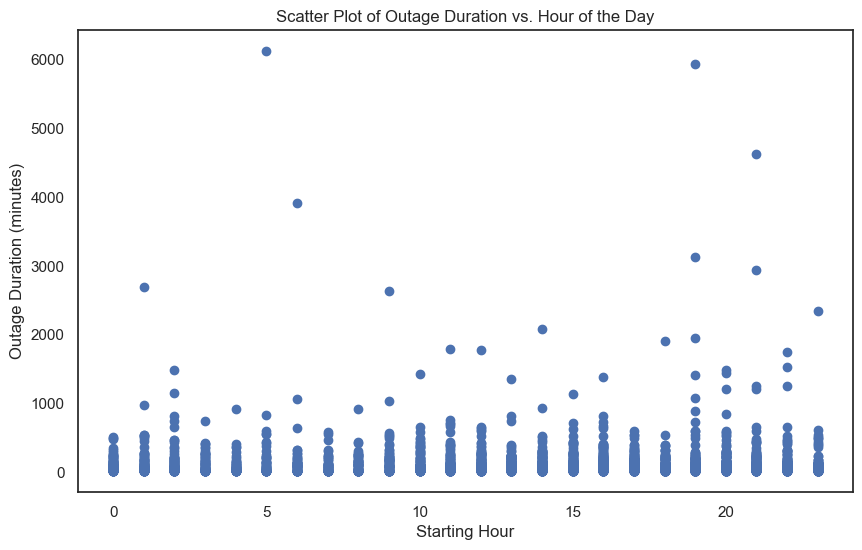

In [593]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(suffolk_starting_df['hour'], suffolk_starting_df['duration_minutes'])

# Add labels and title
plt.xlabel('Starting Hour')
plt.ylabel('Outage Duration (minutes)')
plt.title('Scatter Plot of Outage Duration vs. Hour of the Day')

# Show the plot

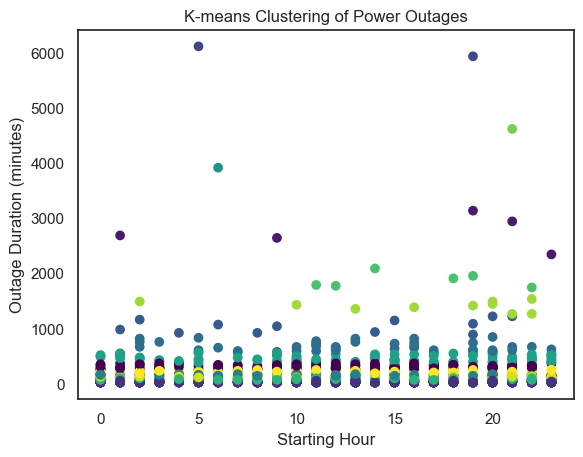

In [594]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the columns you want to use for clustering (replace with your actual column names)
clustering_columns = ['hour', 'duration_minutes']  # Example

# Create a new DataFrame with only the selected columns
X = suffolk_starting_df[clustering_columns]

# Choose the number of clusters (k) - you might need to experiment to find the optimal value
k = 15  # Example

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)  # Set random_state for reproducibility

# Fit the model to your data
kmeans.fit(X)

# Get the cluster labels for each data point
suffolk_starting_df['cluster'] = kmeans.labels_

# Visualize the clusters (optional)
plt.scatter(X['hour'], X['duration_minutes'], c=suffolk_starting_df['cluster'], cmap='viridis')
plt.xlabel('Starting Hour')
plt.ylabel('Outage Duration (minutes)')
plt.title('K-means Clustering of Power Outages')
plt.show()

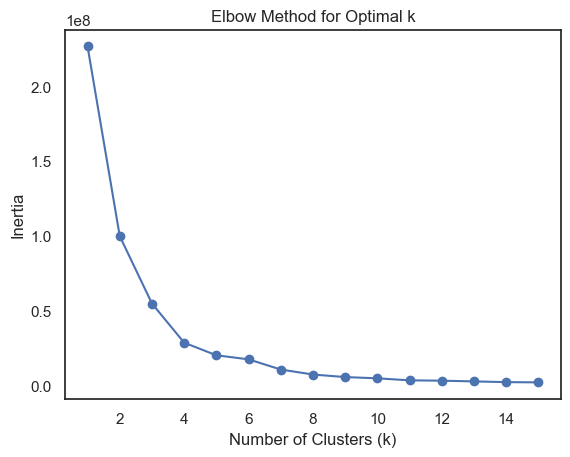

In [595]:
# Elbow Method to find optimal k
inertia = []
k_range = range(1, 16)  # Adjust the range as needed

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Inertia measures within-cluster sum of squares

# Plot the elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


5 clusters seems optimal

In [596]:
# Add cluster labels to the X DataFrame
X['cluster'] = kmeans.labels_

# Group by 'cluster' and calculate statistics
cluster_stats = X.groupby('cluster')[['hour', 'duration_minutes']].agg(['mean', 'median', 'count'])
# Calculate the total number of points
total_count = cluster_stats['hour']['count'].sum()

# Calculate the percentage for each cluster
cluster_stats['percentage'] = ((cluster_stats['hour']['count'] / total_count) * 100).round(2)

# Round the mean and median values to 2 decimal places
cluster_stats = cluster_stats.round(2)

# Display the cluster statistics
print(cluster_stats)

          hour              duration_minutes               percentage
          mean median count             mean  median count           
cluster                                                              
0        12.72   14.0   174           296.03   285.0   174       6.23
1        14.60   19.0     5          2748.00  2685.0     5       0.18
2        13.58   14.0  1051            25.26    15.0  1051      37.66
3        12.00   12.0     2          6030.00  6030.0     2       0.07
4        11.50   11.5    12          1043.75  1050.0    12       0.43
5        13.12   12.5    40           671.25   660.0    40       1.43
6        13.75   15.0   230           146.87   150.0   230       8.24
7         6.00    6.0     1          3915.00  3915.0     1       0.04
8        13.00   14.0   101           450.15   435.0   101       3.62
9        13.64   15.0   661            73.48    75.0   661      23.68
10       16.00   16.0     6          1872.50  1845.0     6       0.21
11       21.00   21.

C:\Users\jonas\AppData\Local\Temp\ipykernel_2756\4120631827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.labels_


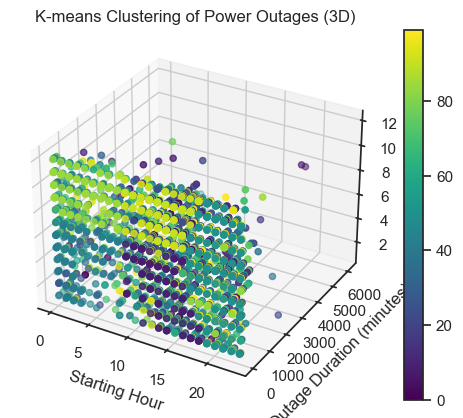

In [597]:
#3D clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# Select the columns for clustering
clustering_columns = ['hour', 'duration_minutes', 'month']

# Create a new DataFrame with only the selected columns
X = suffolk_starting_df[clustering_columns]

# Choose the number of clusters (k)
k = 100

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to your data
kmeans.fit(X)

# Get the cluster labels
suffolk_starting_df['cluster'] = kmeans.labels_

# 3D Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on cluster labels
scatter = ax.scatter(X['hour'], X['duration_minutes'], X['month'], c=suffolk_starting_df['cluster'], cmap='viridis')

# Set labels and title
ax.set_xlabel('Starting Hour')
ax.set_ylabel('Outage Duration (minutes)')
ax.set_zlabel('Month')
ax.set_title('K-means Clustering of Power Outages (3D)')

# Add a colorbar
plt.colorbar(scatter)

# Show the plot
plt.show()

In [598]:
# Add cluster labels to the X DataFrame
X['cluster'] = kmeans.labels_

# Group by 'cluster' and calculate statistics, including 'month'
cluster_stats = X.groupby('cluster')[['hour', 'duration_minutes', 'month']].agg(['mean', 'median', 'count'])

# Calculate the total number of points
total_count = cluster_stats['hour']['count'].sum()

# Calculate the percentage for each cluster
cluster_stats['percentage'] = ((cluster_stats['hour']['count'] / total_count) * 100).round(2)

# Round the mean and median values to 2 decimal places
cluster_stats = cluster_stats.round(2)

# Display the cluster statistics
print(cluster_stats)

          hour              duration_minutes               month               \
          mean median count             mean  median count  mean median count   
cluster                                                                         
0        13.47   14.5    32            285.0   285.0    32  6.19    6.5    32   
1         1.00    1.0     1           2685.0  2685.0     1  9.00    9.0     1   
2        15.17   15.0   104             75.0    75.0   104  8.97    9.0   104   
3        19.00   19.0     1           5940.0  5940.0     1  8.00    8.0     1   
4        11.33    9.0     3           1060.0  1065.0     3  9.33    9.0     3   
...        ...    ...   ...              ...     ...   ...   ...    ...   ...   
95       19.65   19.0    77             60.0    60.0    77  7.88    8.0    77   
96        6.67    6.5     6            405.0   405.0     6  8.50    9.0     6   
97       19.71   20.0    75             90.0    90.0    75  6.23    6.0    75   
98       16.85   17.0    33 

C:\Users\jonas\AppData\Local\Temp\ipykernel_2756\864168018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.labels_


In [599]:
# Sort the cluster_stats DataFrame by the count of 'hour' in descending order
largest_clusters = cluster_stats.sort_values(('hour', 'count'), ascending=False)

# Select the top 10 rows (clusters)
top_10_clusters = largest_clusters.head(10)

# Display the top 10 clusters
print(top_10_clusters)

          hour              duration_minutes               month               \
          mean median count             mean median count   mean median count   
cluster                                                                         
50       20.11   20.0   183             15.0   15.0   183   7.04    7.0   183   
91       13.39   14.0   124             15.0   15.0   124  10.15   11.0   124   
31       13.62   13.0   117             60.0   60.0   117   6.00    6.0   117   
8        13.22   13.0   105             15.0   15.0   105   4.37    5.0   105   
2        15.17   15.0   104             75.0   75.0   104   8.97    9.0   104   
84        3.95    4.0    94             15.0   15.0    94  10.01   10.0    94   
83       20.14   20.0    88             30.0   30.0    88   6.03    6.0    88   
60       17.76   18.0    85             75.0   75.0    85   3.53    3.0    85   
33       17.36   17.0    84            120.0  120.0    84   7.05    7.0    84   
28       13.06   13.0    78 

In [600]:
from sklearn.cluster import SpectralClustering

# ... (Your existing code to create 'X' DataFrame)

spectral = SpectralClustering(n_clusters=100, affinity='nearest_neighbors')  # Adjust affinity as needed
X['cluster'] = spectral.fit_predict(X)  # Assuming 'X' contains your features for clustering

# Group by 'cluster' and calculate statistics
cluster_stats = X.groupby('cluster')[['hour', 'duration_minutes', 'month']].agg(['mean', 'median', 'count'])

# Calculate the total number of points
total_count = cluster_stats['hour']['count'].sum()

# Calculate the percentage for each cluster
cluster_stats['percentage'] = ((cluster_stats['hour']['count'] / total_count) * 100).round(2)

# Round the mean and median values
cluster_stats = cluster_stats.round(2)

# Sort by count in descending order
largest_clusters = cluster_stats.sort_values(('hour', 'count'), ascending=True)

# Select the top 10
top_10_clusters = largest_clusters.head(100)

# Display
print(top_10_clusters)

C:\Users\jonas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


          hour              duration_minutes               month               \
          mean median count             mean median count   mean median count   
cluster                                                                         
11       16.44   19.0     9           603.33  600.0     9   6.56    7.0     9   
0        22.27   22.0    11            60.00   60.0    11   3.18    3.0    11   
4         8.73    7.0    11           565.91  570.0    11   5.91    6.0    11   
19       14.36   14.0    11           150.00  150.0    11  10.73   11.0    11   
72       16.36   16.0    11            45.00   45.0    11   2.27    2.0    11   
...        ...    ...   ...              ...    ...   ...    ...    ...   ...   
71       16.56   16.5    32            30.00   30.0    32  10.25   10.0    32   
86       13.44   13.0    32            60.00   60.0    32   9.38    9.0    32   
74        7.12    7.0    33            15.00   15.0    33   9.94   10.0    33   
37       10.61   11.0    44 

C:\Users\jonas\AppData\Local\Temp\ipykernel_2756\673628861.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = spectral.fit_predict(X)  # Assuming 'X' contains your features for clustering


In [601]:
import pandas as pd

# Count occurrences of each unique duration value
duration_counts = suffolk_starting_df['duration_minutes'].value_counts()

# Calculate probabilities
total_count = len(suffolk_starting_df)
duration_probabilities = (duration_counts / total_count)

# Create the new DataFrame, starting at 15 minutes
suffolk_probabilities = pd.DataFrame({
    'duration_minutes': duration_probabilities.index,
    '15min_probability': duration_probabilities.values
})

# Sort the DataFrame by 'duration_minutes' in ascending order
suffolk_probabilities = suffolk_probabilities.sort_values(by='duration_minutes')


# Display the results
print("\nProbability of Power Outage Durations in 15-minute Intervals for Suffolk County (starting at 15 minutes):\n")
print(suffolk_probabilities)
suffolk_probabilities['15min_probability'].sum()
total_count


Probability of Power Outage Durations in 15-minute Intervals for Suffolk County (starting at 15 minutes):

    duration_minutes  15min_probability
0                 15           0.202078
1                 30           0.091365
3                 45           0.083124
2                 60           0.089574
4                 75           0.081691
..               ...                ...
71              3135           0.000358
77              3915           0.000358
52              4620           0.000358
62              5940           0.000358
79              6120           0.000358

[86 rows x 2 columns]


2791

In [602]:
#Clustering with extreme values option

import pandas as pd
from sklearn.cluster import KMeans

def time_domain_reduction_kmeans_probability_based(df, n_rep_per, extreme_value=0):
    """
    Performs time domain reduction on a DataFrame with 'duration_minutes' and '15min_probability' columns
    using K-means clustering based on probabilities. Optionally handles the largest duration separately.

    Args:
        df: The input DataFrame.
        n_rep_per: The desired number of representative periods in the output.
        extreme_value: If 1, the largest duration_minutes is treated as a separate cluster.

    Returns:
        A new DataFrame with reduced time periods, preserving the overall probability distribution
        with emphasis on high-probability regions.
    """

    # Handle extreme value if needed
    if extreme_value == 1:
        # Find the row with the largest duration_minutes
        extreme_row = df.loc[df['duration_minutes'].idxmax()].copy()
        # Remove this row from the DataFrame for clustering
        df_for_clustering = df.drop(df['duration_minutes'].idxmax())
        # Adjust the number of clusters for K-means
        n_clusters = n_rep_per - 1 
    else:
        df_for_clustering = df.copy()
        n_clusters = n_rep_per

    # Prepare data for clustering
    X = df_for_clustering[['15min_probability']].values

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    df_for_clustering['cluster'] = kmeans.labels_

    # Aggregate durations and probabilities within each cluster
    reduced_df = df_for_clustering.groupby('cluster').agg({
        'duration_minutes': 'mean',
        '15min_probability': 'sum'
    }).reset_index(drop=True)

    # Round duration_minutes to the nearest multiple of 15
    reduced_df['duration_minutes'] = (reduced_df['duration_minutes'] // 15) * 15

    # Add the extreme value row back if needed
    if extreme_value == 1:
        reduced_df = pd.concat([reduced_df, extreme_row.to_frame().T], ignore_index=True)

    # Sort the DataFrame by 'duration_minutes' in ascending order
    reduced_df = reduced_df.sort_values(by='duration_minutes')

    return reduced_df

# Example usage
n_rep_per = 48
extreme_value = 1  # Set to 1 to include the extreme value as a separate cluster
reduced_suffolk_probabilities = time_domain_reduction_kmeans_probability_based(suffolk_probabilities, n_rep_per, extreme_value)
#reduced_suffolk_probabilities.drop(columns=['cumulative_probability', 'cluster'], inplace=True)

print(reduced_suffolk_probabilities)

    duration_minutes  15min_probability
2               15.0           0.202078
1               30.0           0.091365
19              45.0           0.083124
16              60.0           0.089574
6               75.0           0.081691
9               90.0           0.065568
5              105.0           0.055894
12             120.0           0.041204
3              135.0           0.036546
10             150.0           0.026514
7              165.0           0.019348
13             180.0           0.016482
26             210.0           0.015407
17             210.0           0.035829
4              240.0           0.013257
27             255.0           0.012540
11             270.0           0.010032
22             285.0           0.011465
21             315.0           0.008241
20             330.0           0.006449
28             330.0           0.009316
23             390.0           0.012899
15             390.0           0.005016
8              465.0           0.012899


C:\Users\jonas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (30) found smaller than n_clusters (47). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Clusters indicate that the 78 % shortest power outages have a mean duration of 94min.

end


In [603]:
import pandas as pd
import math

def generate_demand_profile(reduced_suffolk_probabilities, n_rep_per, backup_demand_MW):
    """
    Generates a demand profile based on outage probabilities and representative periods.

    Args:
        reduced_suffolk_probabilities: DataFrame with 'duration_minutes' and '15min_probability'.
        n_rep_per: Number of representative periods.

    Returns:
        DataFrame with 'Time_Index' and 'Demand_MW_z1' columns.
    """
    
    Timesteps_per_Rep_Period = int(35040 / n_rep_per)

    demand_profile = []

    for _, row in reduced_suffolk_probabilities.iterrows():
        duration_minutes = row['duration_minutes']
        num_backup_demand = int(duration_minutes / 15)  # Number of 1s at the beginning
        sequence = [backup_demand_MW] * num_backup_demand + [0] * (Timesteps_per_Rep_Period - num_backup_demand)
        demand_profile.extend(sequence)

    output_df = pd.DataFrame({
        'Time_Index': range(1, 35041),
        'Demand_MW_z1': demand_profile
    })

    return output_df

# Example usage (assuming you have reduced_suffolk_probabilities DataFrame)

backup_demand_MW = 15
output_df = generate_demand_profile(reduced_suffolk_probabilities, n_rep_per, backup_demand_MW)

# Save to CSV
output_df.to_csv('Demand_data.csv', index=False)

print("Demand profile generated and saved to 'demand_profile.csv'")

ValueError: All arrays must be of the same length

In [ ]:
import pandas as pd
import math

def generate_demand_profile(reduced_suffolk_probabilities, n_rep_per, backup_demand_MW):
    """
    Generates a demand profile based on outage probabilities and representative periods,
    with specific column structure.

    Args:
        reduced_suffolk_probabilities: DataFrame with 'duration_minutes' and '15min_probability'.
        n_rep_per: Number of representative periods.
        backup_demand_MW: The value to use for backup demand during outages.

    Returns:
        DataFrame with specified columns in the correct order.
    """

    Timesteps_per_Rep_Period = 35040 // n_rep_per

    demand_profile = []
    rep_period_list = []

    for _, row in reduced_suffolk_probabilities.iterrows():
        duration_minutes = row['duration_minutes']
        num_backup_demand = int(duration_minutes / 15)
        sequence = [backup_demand_MW] * num_backup_demand + [0] * (Timesteps_per_Rep_Period - num_backup_demand)
        demand_profile.extend(sequence)
        rep_period_list.extend([_ + 1] * Timesteps_per_Rep_Period)  # Start Rep_Period from 1

    # Create the main DataFrame with Time_Index and Demand_MW_z1
    output_df = pd.DataFrame({
        'Time_Index': range(1, 35041),
        'Demand_MW_z1': demand_profile
    })

    # Create a separate DataFrame for the single-row columns
    summary_df = pd.DataFrame({
        'Voll': [500000],
        'Demand_Segment': [1],
        'Cost_of_Demand_Curtailment_per_MW': [1],
        'Max_Demand_Curtailment': [1],
        '$/MWh': [20000],
        'Rep_Periods': [n_rep_per],
        'Timesteps_per_Rep_Period': [Timesteps_per_Rep_Period],
    })

    # Create a DataFrame for Sub_Weights, multiplying each probability by 35040
    sub_weights_df = pd.DataFrame({
        'Sub_Weights': [prob * 35040 for prob in reduced_suffolk_probabilities['15min_probability'].tolist()]
    })

    # Concatenate the three DataFrames horizontally
    final_df = pd.concat([summary_df, sub_weights_df, output_df], axis=1)


    return final_df

# Example usage
# ... (assuming you have reduced_suffolk_probabilities and n_rep_per defined)
backup_demand_MW = 5 
output_df = generate_demand_profile(reduced_suffolk_probabilities, n_rep_per, backup_demand_MW)

# Save to CSV
output_df.to_csv('Demand_data.csv', index=False)

print("Demand profile generated and saved to 'Demand_data.csv'")

Demand profile generated and saved to 'Demand_data.csv'
